In [18]:

import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import os
import cv2
import numpy as np


In [19]:

images = []
labels = []
 
path = 'data/training_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)


In [20]:
X = np.array(images)
y = np.array(labels)

In [21]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [22]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [23]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))


c:\Users\juanm\Documents\workspace\inacap\ml-labels\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)


Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.6024 - loss: 1.4758 - val_accuracy: 0.9220 - val_loss: 0.2684
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9358 - loss: 0.2020 - val_accuracy: 0.9270 - val_loss: 0.2334
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9562 - loss: 0.1293 - val_accuracy: 0.9476 - val_loss: 0.1748
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9658 - loss: 0.0947 - val_accuracy: 0.9455 - val_loss: 0.1962
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9714 - loss: 0.0845 - val_accuracy: 0.9435 - val_loss: 0.1802
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9747 - loss: 0.0727 - val_accuracy: 0.9476 - val_loss: 0.1990
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9766 - loss: 0.0628 - val_accuracy: 0.9525 - val_loss: 0.2021
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9776 -

In [25]:
model.save('ocr.h5')


In [26]:

test_images = []
test_labels = []
path = 'data/testing_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)


In [27]:


X_test = np.array(test_images)
y_test = np.array(test_labels)


In [ ]:


preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


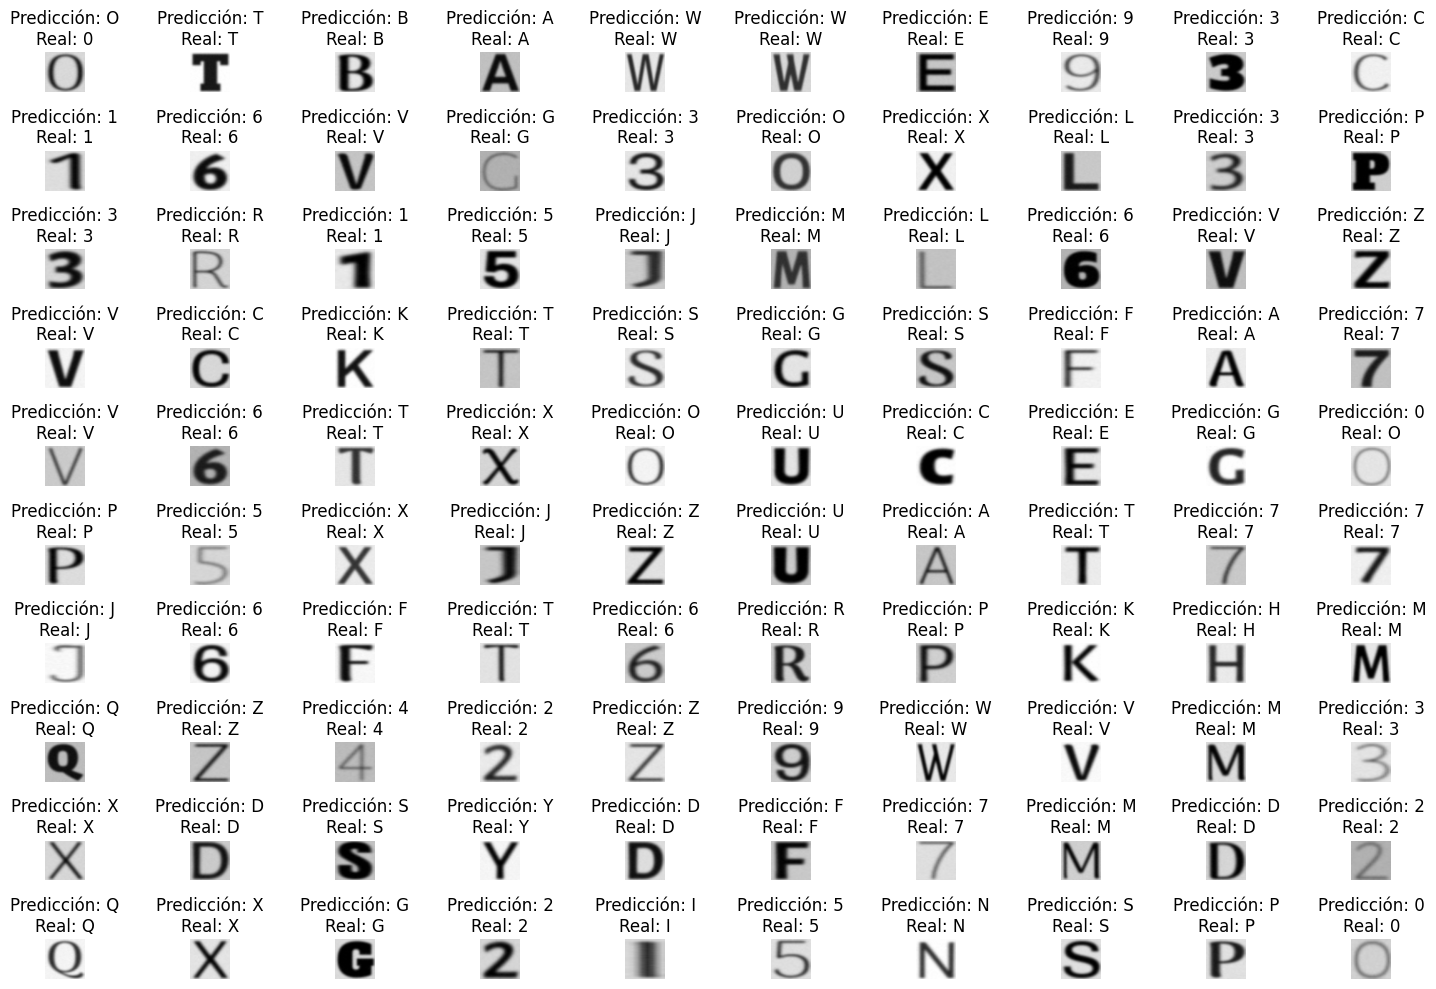

Porcentaje de exito: 98.41%
Porcentaje de error: 1.59%
Porcentaje de error: 1.59%


In [ ]:
import matplotlib.pyplot as plt

# Número de imágenes a mostrar
num_images = 100

# Selecciona aleatoriamente algunas imágenes del conjunto de prueba
indices = np.random.choice(len(X_test), num_images, replace=False)

# Configuración de la gráfica
plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    plt.subplot(10, 10, i + 1)  # 2 filas, 5 columnas
    plt.imshow(X_test[idx])  # Mostrar la imagen
    plt.axis('off')  # Elimina los ejes
    plt.title(f"Predicción: {predicted_labels[idx]}\nReal: {y_test[idx]}")

plt.tight_layout()
plt.show()
# porcentaje de exito
correct = np.sum(predicted_labels == y_test)
print(f"Porcentaje de exito: {correct / len(y_test) * 100:.2f}%")

# Porcentaje de error
wrong = len(y_test) - correct
print(f"Porcentaje de error: {wrong / len(y_test) * 100:.2f}%")


In [31]:
plt.savefig("predicciones.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>